# EDA on Diabetes health indicators Dataset

## Load Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Function to save figures 

In [4]:
# code to save the figures as high-res PNGs
import os
from pathlib import Path
from matplotlib import pyplot as plt

IMAGES_PATH = Path() /"Images/EDA"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Load Dataset

In [5]:
df = pd.read_csv("Datasets/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

## Exploratory Data Analysis(EDA)

#### Detailed Dataset Info

In [7]:
# See dataset detailed info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

## Statistical Summary 

In [8]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [9]:
## see first 5 rows
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [10]:
## see last 5 rows
df.tail()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
70691,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


## Value Counts

In [11]:
df["Diabetes_binary"].value_counts()

Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64

In [14]:
 df["HighBP"].value_counts()

HighBP
1.0    39832
0.0    30860
Name: count, dtype: int64

In [15]:
df["Smoker"].value_counts()

Smoker
0.0    37094
1.0    33598
Name: count, dtype: int64

In [16]:
df["Stroke"].value_counts()

Stroke
0.0    66297
1.0     4395
Name: count, dtype: int64

In [17]:
df['HeartDiseaseorAttack'].value_counts()

HeartDiseaseorAttack
0.0    60243
1.0    10449
Name: count, dtype: int64

In [18]:
 df["Education"].value_counts()

Education
6.0    26020
5.0    20030
4.0    19473
3.0     3447
2.0     1647
1.0       75
Name: count, dtype: int64

In [19]:
 df["Income"].value_counts()

Income
8.0    20646
7.0    11425
6.0    10287
5.0     8010
4.0     6658
3.0     5557
2.0     4498
1.0     3611
Name: count, dtype: int64

## Data Visualization 

## Diabetes target variable count

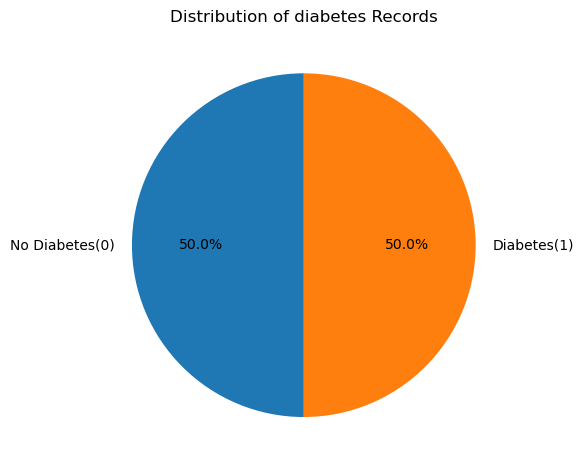

In [25]:
labels = ['No Diabetes(0)','Diabetes(1)']
sizes = [df['Diabetes_binary'].value_counts()[0],df['Diabetes_binary'].value_counts()[1]]

# Create a pie chart 
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90)
plt.title('Distribution of diabetes Records')
#show the figure
save_fig('Diabetes pie chart')
plt.show()

# Diabetes Records per Gender

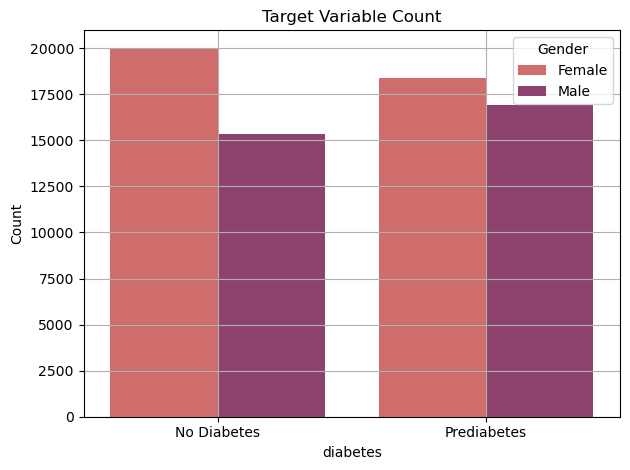

In [28]:
# 0 = No diabetes
# 1 = Pre diabetes
# 0 = female
# 1 = male

#Create a countplot
sns.countplot(data=df,x='Diabetes_binary',hue='Sex',palette='flare')
#Set plot labels
plt.xlabel('diabetes')
plt.ylabel('Count')
plt.title('Target Variable Count')
plt.legend(title='Gender',labels=["Female","Male"])
plt.xticks(ticks=[0,1],labels=['No Diabetes','Prediabetes'])
plt.grid()
#Save the fig
save_fig('Target variable count_grid')
plt.show()

## Relationship between diabetes and stroke

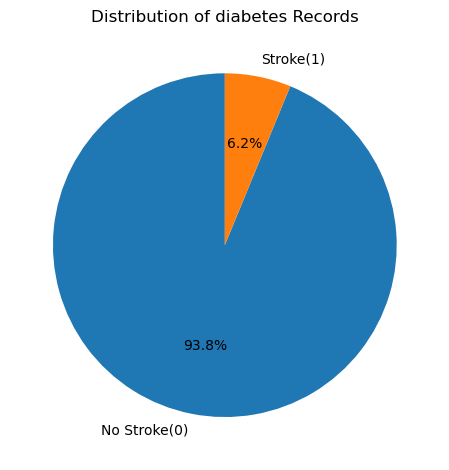

In [31]:
labels = ['No Stroke(0)','Stroke(1)']
sizes = [df['Stroke'].value_counts()[0],df['Stroke'].value_counts()[1]]

# Create a pie chart 
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90)
plt.title('Distribution of diabetes Records')
#show the figure
save_fig('Diabetes pie chart')
plt.show()

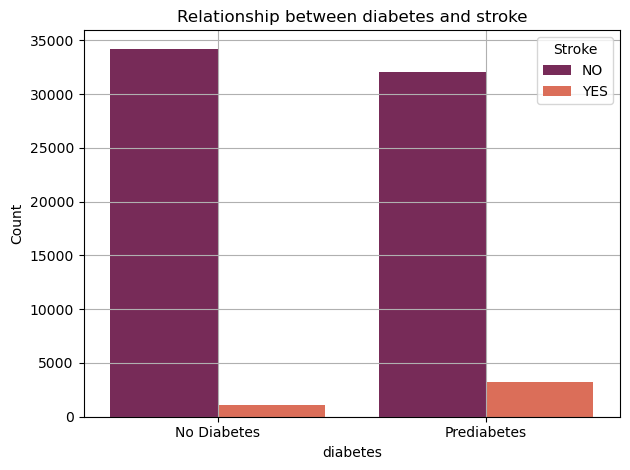

In [32]:
# 0 = No diabetes
# 1 = Pre diabetes
# 0 = no stroke
# 1 = stroke

#Create a countplot
sns.countplot(data=df,x='Diabetes_binary',hue='Stroke',palette='rocket')
#Set plot labels
plt.xlabel('diabetes')
plt.ylabel('Count')
plt.title('Relationship between diabetes and stroke')
plt.legend(title='Stroke',labels=["NO","YES"])
plt.xticks(ticks=[0,1],labels=['No Diabetes','Prediabetes'])
plt.grid()
#Save the fig
save_fig('Relationship Between Diabetes and Stroke')
plt.show()

## Relationship between diabetes and highbp

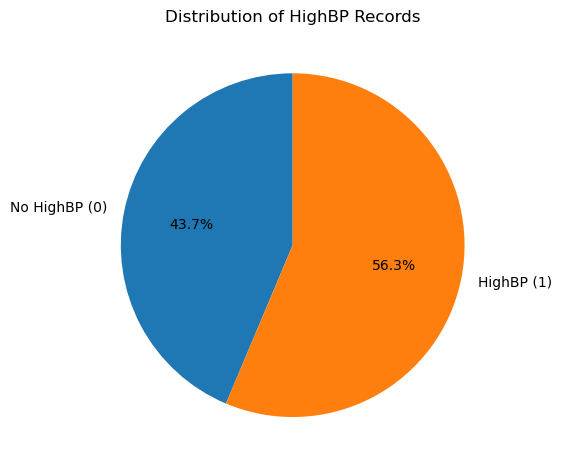

In [34]:
labels = ['No HighBP (0)', 'HighBP (1)']
sizes = [df['HighBP'].value_counts()[0], df['HighBP'].value_counts()[1]]

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of HighBP Records')
# Save the figure
save_fig('HighBP pie chart')
plt.show()

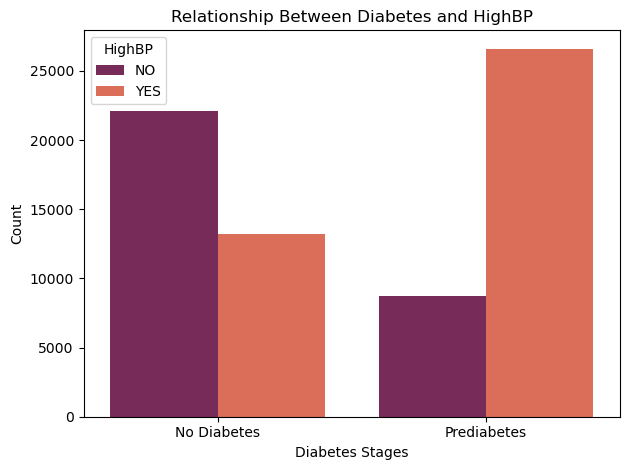

In [35]:
# Create a countplot
sns.countplot(data=df, x='Diabetes_binary', hue='HighBP', palette='rocket')
# Set plot labels
plt.xlabel('Diabetes Stages')
plt.ylabel('Count')
plt.title('Relationship Between Diabetes and HighBP')
plt.legend(title='HighBP', labels=["NO","YES"])
plt.xticks(ticks=[0,1], labels=['No Diabetes', 'Prediabetes'])
# plt.grid()
#Save the figure
save_fig('Relationship Between Diabetes and HighBP')
plt.show()

## Find relation for HighChol, BMI, Smoker, Heart Dieases, Physical Activity

# Histogram of BMI

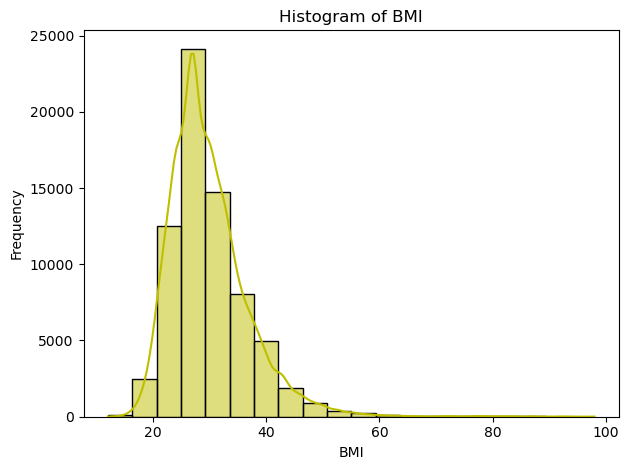

In [36]:
# Create a histogram using seaborn
sns.histplot(data=df, bins=20, x='BMI',kde=True,color='y')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI')
#save figure
save_fig('Histogram of BMI')
plt.show()

## Find histogram for  Mental health, Age